### The Mysterious Case of Disappearing Readers

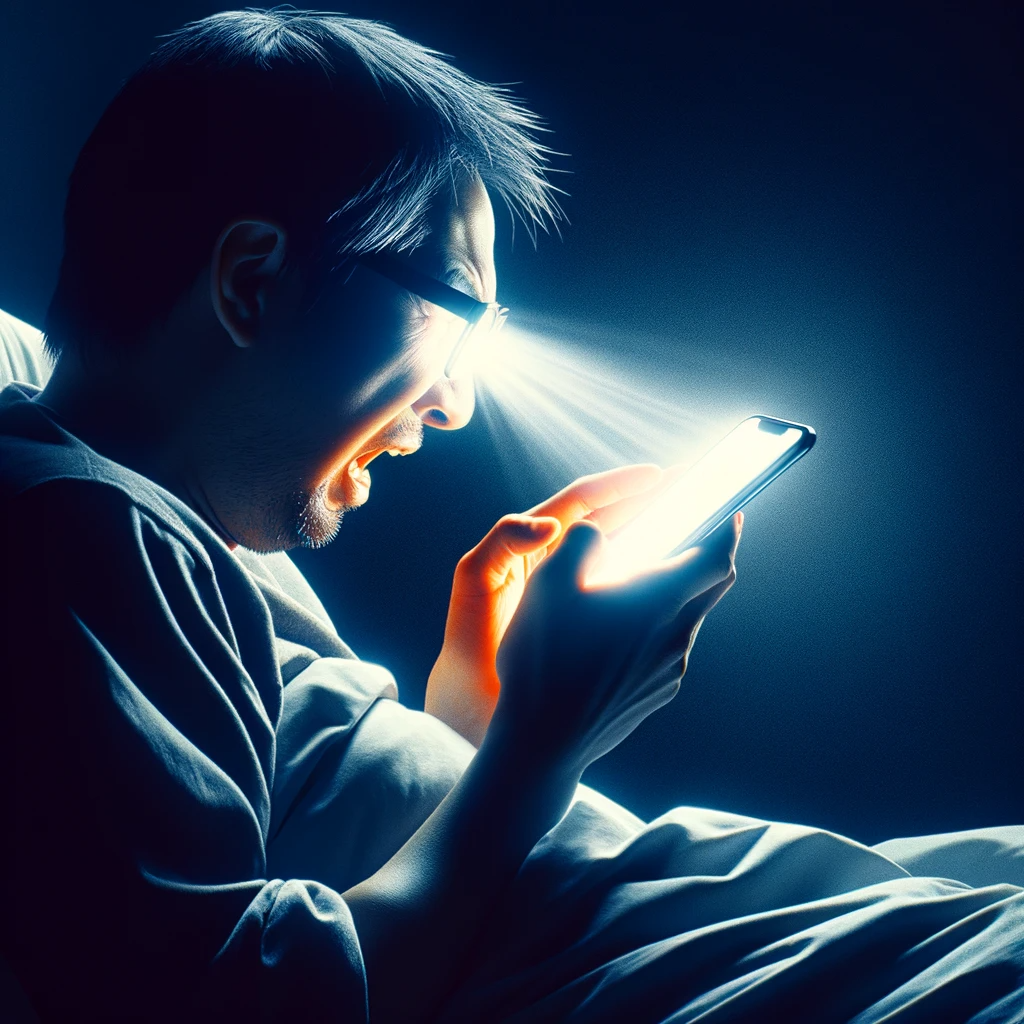

### Install Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### Download the data

In [8]:
# Load the dataset (adjust the path if necessary)
df = pd.read_excel(r'C:\Users\SIVA\Desktop\ML\Readership_Data_Logistic_Regression.xlsx')


### Feature Engineering

In [9]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Reading_Frequency', 'Device_Type', 'Article_Preference'], drop_first=True)

# Define features and target variable
X = df.drop('Subscription_Status', axis=1)
y = df['Subscription_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



### Define and Build the Model

In [10]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)


G:\Install\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualize the Results

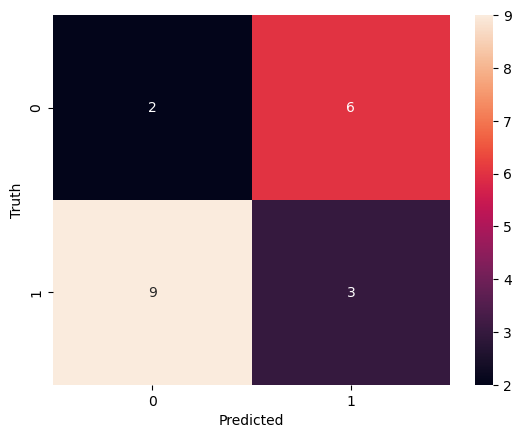

In [11]:
# Visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


### Interpret the Results

In [12]:
# Classification report and accuracy
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.25      0.21         8
           1       0.33      0.25      0.29        12

    accuracy                           0.25        20
   macro avg       0.26      0.25      0.25        20
weighted avg       0.27      0.25      0.26        20

Accuracy: 0.25


To understand why the accuracy of a machine learning model might be as low as 25%, we need to consider several factors.

Imbalanced Dataset: If the dataset is imbalanced, meaning one class (subscribers stopping or continuing their subscriptions) significantly outnumbers the other, the model might become biased towards the majority class. In extreme cases, a model might predict only the majority class.

Inadequate or Irrelevant Features: The features used to train the model might not be sufficient or relevant to predict the outcome accurately. For example, if the features like 'Age' or 'Reading Frequency' don't have a strong relationship with the subscription status, the model may not learn effectively.

Model Complexity: Logistic regression is a relatively simple linear model. If the relationship between features and the target variable is complex or nonlinear, logistic regression might not capture these relationships well.

Overfitting or Underfitting: Overfitting occurs when the model learns the training data too well, including its noise and outliers, and fails to generalize to new data. Underfitting happens when the model is too simple to capture the underlying pattern of the data. Both can lead to poor performance on unseen data.

Quality of Data: Errors in the data, such as incorrect labels, missing values, or noise, can significantly impact the model's performance.

Data Preprocessing: Ineffective preprocessing, like improper handling of categorical variables or not standardizing/normalizing numerical variables, can lead to poor model performance.

Evaluation Methodology: If the train-test split was not done properly, or if there’s a significant difference in the distribution of data between the training and testing sets, it can lead to lower performance on the test set.

Random Chance: In cases of small datasets, sometimes a low accuracy can also be a result of random chance or variability in the way data is split between training and testing sets.

To improve the model, you might want to try:

Ensuring the dataset is balanced.
Experimenting with different features or feature engineering.
Trying more complex models if logistic regression is too simple.
Fine-tuning the model and preprocessing steps.
Using cross-validation to assess model performance more reliably.




